# Table of Content
* [1.Descrizione dataset](#1.Descrizione-dataset)
* [2.Import librerie e dati](#2.Import-librerie-e-dati)
* [3.Analisi esplorativa dei dati](#3.Analisi-esplorativa-dei-dati)
    * [3.1.Consegne](#3.1.Consegne)
    * [3.2.Somministrazioni](#3.2.Somministrazioni)
    * [3.3.Contagi](#3.3.Contagi)

## 1.Descrizione dataset

Il seguente dataset è riferito ai dati ufficiali del governo italiano, disponibili su https://github.com/italia/covid19-opendata-vaccini

Di seguito i dataset analizzati:


*   **consegne-vaccini-latest**: dati sul totale delle consegne giornaliere dei vaccini suddivise per regioni.
*   **somministrazioni-vaccini-latest**: dati sulle somministrazioni giornaliere dei vaccini suddivisi per regioni, fasce d'età e categorie di appartenenza dei soggetti vaccinati.


## 2.Import librerie e dati

In [76]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,10)

import seaborn as sns
sns.set()

import utils as u

In [2]:
df_consegne = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv', 
                          parse_dates=['data_consegna'])

In [3]:
df_somministrazioni = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv',
                                  parse_dates=['data_somministrazione'])

In [4]:
df_contagi = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv',
                        parse_dates=['data'])

## 3.Analisi esplorativa dei dati

### 3.1.Consegne

In [5]:
df_consegne.shape

(1289, 8)

In [6]:
df_consegne.tail()

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
1284,VEN,Pfizer/BioNTech,169650,2021-05-19,ITH,ITH3,5,Veneto
1285,VEN,Janssen,17050,2021-05-21,ITH,ITH3,5,Veneto
1286,VEN,Moderna,29300,2021-05-21,ITH,ITH3,5,Veneto
1287,VEN,Moderna,11200,2021-05-24,ITH,ITH3,5,Veneto
1288,VEN,Vaxzevria (AstraZeneca),29400,2021-05-24,ITH,ITH3,5,Veneto


In [7]:
df_consegne.columns

Index(['area', 'fornitore', 'numero_dosi', 'data_consegna', 'codice_NUTS1',
       'codice_NUTS2', 'codice_regione_ISTAT', 'nome_area'],
      dtype='object')

In [8]:
tot_consegne = df_consegne.numero_dosi.sum()
tot_consegne

33618267

In [9]:
df_consegne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   area                  1289 non-null   object        
 1   fornitore             1289 non-null   object        
 2   numero_dosi           1289 non-null   int64         
 3   data_consegna         1289 non-null   datetime64[ns]
 4   codice_NUTS1          1289 non-null   object        
 5   codice_NUTS2          1289 non-null   object        
 6   codice_regione_ISTAT  1289 non-null   int64         
 7   nome_area             1289 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 80.7+ KB


In [10]:
df_consegne_t = df_consegne.set_index('data_consegna')
df_consegne_t.head()

,area,fornitore,numero_dosi,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
data_consegna,,,,,,,
2020-12-27,ABR,Pfizer/BioNTech,135,ITF,ITF1,13,Abruzzo
2020-12-30,ABR,Pfizer/BioNTech,7800,ITF,ITF1,13,Abruzzo
2021-01-05,ABR,Pfizer/BioNTech,3900,ITF,ITF1,13,Abruzzo
2021-01-07,ABR,Pfizer/BioNTech,3900,ITF,ITF1,13,Abruzzo
2021-01-11,ABR,Pfizer/BioNTech,3900,ITF,ITF1,13,Abruzzo


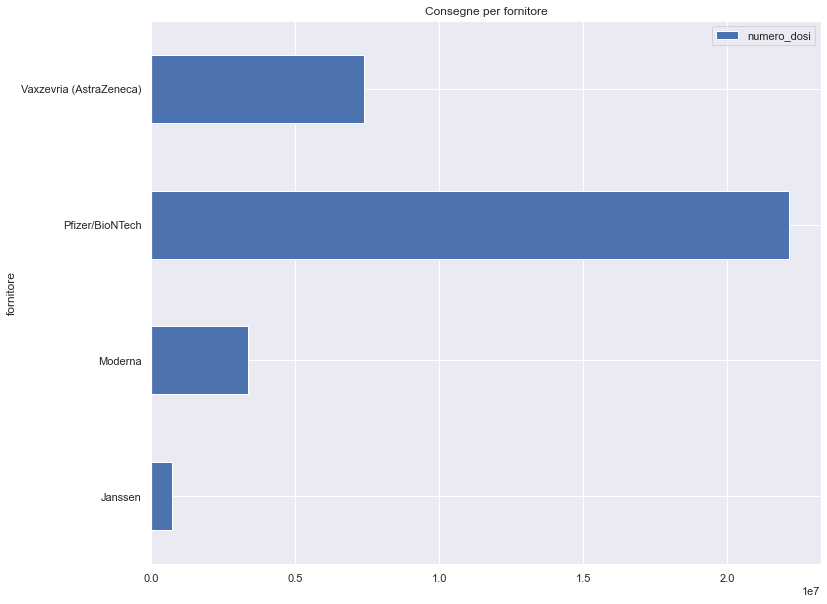

In [75]:
df_consegne.groupby('fornitore')['numero_dosi']\
            .sum()\
            .plot(kind='barh',
                  title='Consegne per fornitore')
plt.legend()
plt.show()

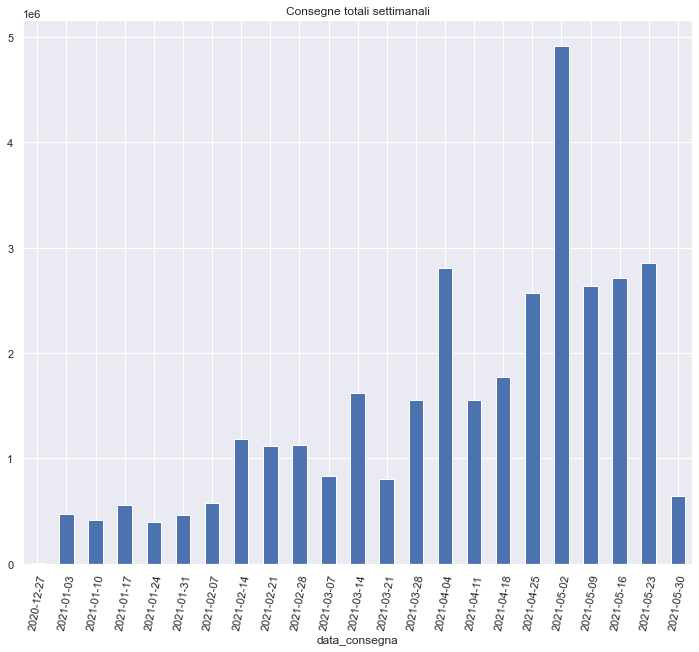

In [69]:
fig, ax = plt.subplots()
df_consegne_t.resample('W').sum()['numero_dosi'].plot(kind='bar', title='Consegne totali settimanali')
ax.set_xticklabels(sorted(set(df_consegne_t.resample('W').sum().index.astype(str).values)), rotation=80)
plt.show()

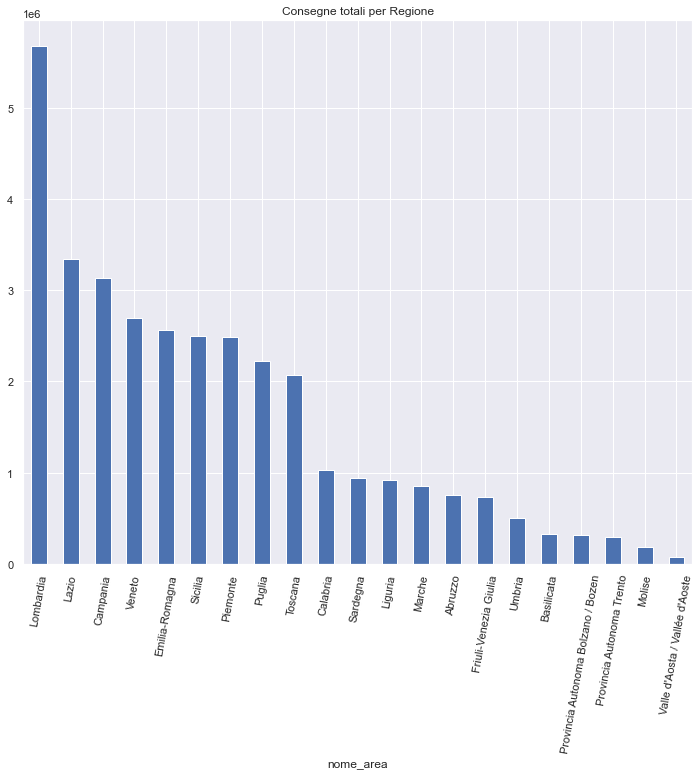

In [70]:
df_consegne.groupby('nome_area')\
            .sum()['numero_dosi']\
            .sort_values(ascending=False)\
            .plot(kind='bar',
                    title='Consegne totali per Regione')
plt.xticks(rotation=80)
plt.show()

In [14]:
df_consegne_sett = u.get_dfweekly_from_df(df_consegne_t, 'fornitore', 'numero_dosi')
df_consegne_sett

,numero_dosi,fornitore
data_consegna,,
2020-12-27,9750,Pfizer/BioNTech
2021-01-03,469950,Pfizer/BioNTech
2021-01-10,419250,Pfizer/BioNTech
2021-01-17,510900,Pfizer/BioNTech
2021-01-24,397800,Pfizer/BioNTech
...,...,...
2021-04-25,179800,Janssen
2021-05-02,157000,Janssen
2021-05-09,6000,Janssen


In [15]:
sorted(set(df_consegne_sett.index.astype(str).values))

['2020-12-27',
 '2021-01-03',
 '2021-01-10',
 '2021-01-17',
 '2021-01-24',
 '2021-01-31',
 '2021-02-07',
 '2021-02-14',
 '2021-02-21',
 '2021-02-28',
 '2021-03-07',
 '2021-03-14',
 '2021-03-21',
 '2021-03-28',
 '2021-04-04',
 '2021-04-11',
 '2021-04-18',
 '2021-04-25',
 '2021-05-02',
 '2021-05-09',
 '2021-05-16',
 '2021-05-23',
 '2021-05-30']

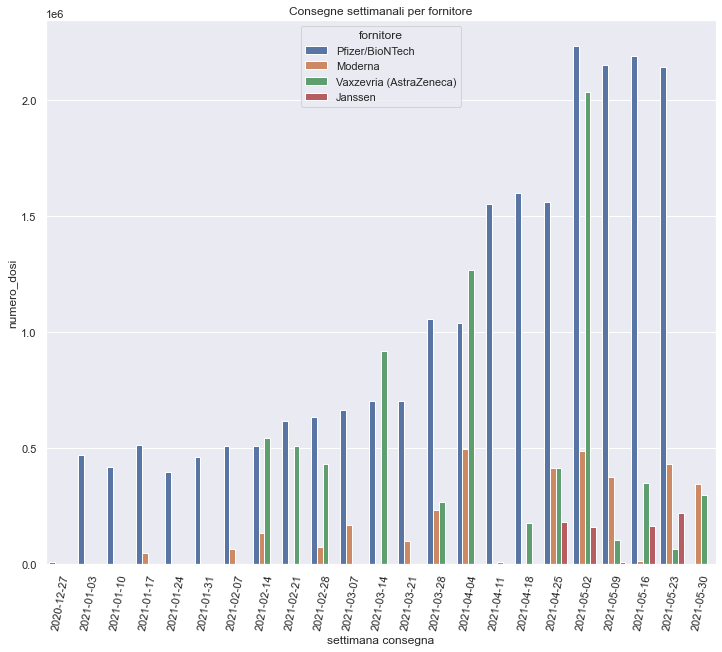

In [71]:
fig, ax = plt.subplots()
sns.barplot(data = df_consegne_sett, x=df_consegne_sett.index, y='numero_dosi', hue='fornitore',ci=None, ax=ax)
plt.title('Consegne settimanali per fornitore')
plt.xticks(rotation=80)
plt.xlabel('settimana consegna')
ax.set_xticklabels(sorted(set(df_consegne_sett.index.astype(str).values)))
plt.show()

### 3.2.Somministrazioni

In [17]:
df_somministrazioni.shape

(57693, 22)

In [18]:
df_somministrazioni.tail()

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,categoria_operatori_sanitari_sociosanitari,categoria_personale_non_sanitario,categoria_ospiti_rsa,categoria_60_69,...,categoria_forze_armate,categoria_personale_scolastico,categoria_soggetti_fragili,categoria_altro,prima_dose,seconda_dose,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
57688,2021-05-25,Vaxzevria (AstraZeneca),VEN,50-59,537,756,13,158,0,0,...,263,815,1,43,18,1275,ITH,ITH3,5,Veneto
57689,2021-05-25,Vaxzevria (AstraZeneca),VEN,60-69,267,327,7,85,0,50,...,21,430,0,1,30,564,ITH,ITH3,5,Veneto
57690,2021-05-25,Vaxzevria (AstraZeneca),VEN,70-79,522,607,8,20,1,0,...,1,13,0,0,14,1115,ITH,ITH3,5,Veneto
57691,2021-05-25,Vaxzevria (AstraZeneca),VEN,80-89,29,62,0,0,1,0,...,0,0,0,0,1,90,ITH,ITH3,5,Veneto
57692,2021-05-25,Vaxzevria (AstraZeneca),VEN,90+,9,19,0,0,0,0,...,0,0,0,0,0,28,ITH,ITH3,5,Veneto


In [19]:
df_somministrazioni['totale'] = df_somministrazioni['sesso_maschile'] + df_somministrazioni['sesso_femminile']

In [20]:
totale_somministrazioni = df_somministrazioni['totale'].sum()
totale_somministrazioni

31854231

In [21]:
df_somministrazioni_t = df_somministrazioni.set_index('data_somministrazione')

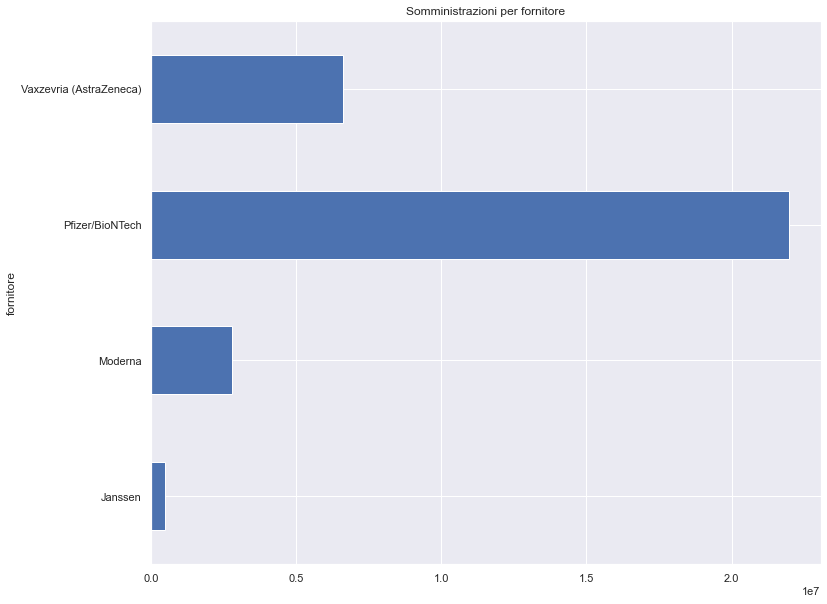

In [22]:
df_somministrazioni.groupby('fornitore')['totale']\
            .sum()\
            .plot(kind='barh',
                  title='Somministrazioni per fornitore')
plt.show()

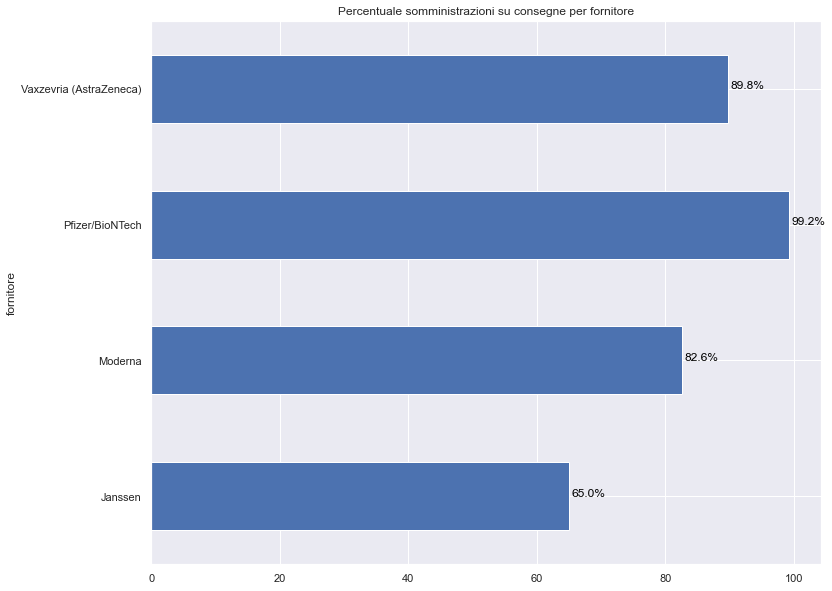

In [23]:
somministrazioni_consegne_forn = df_somministrazioni.groupby('fornitore')['totale'].sum()/df_consegne.groupby('fornitore')['numero_dosi'].sum()
somministrazioni_consegne_forn = round(somministrazioni_consegne_forn*100, 1)
somministrazioni_consegne_forn.plot(kind='barh', title='Percentuale somministrazioni su consegne per fornitore')
for index, row in enumerate(somministrazioni_consegne_forn):
    plt.text(x = row+3 , y=index, s=f'{row}%', color='black', ha="center")
plt.show()

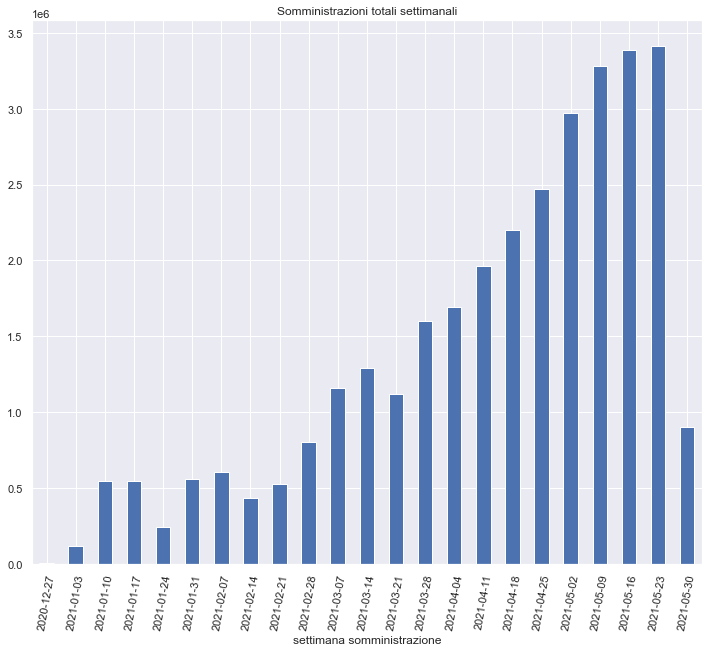

In [24]:
fig, ax = plt.subplots()
df_somministrazioni_t.resample('W').sum()['totale'].plot(kind='bar', title='Somministrazioni totali settimanali')
ax.set_xticklabels(sorted(set(df_somministrazioni_t.resample('W').sum().index.astype(str).values)), rotation=80)
plt.xlabel('settimana somministrazione')
plt.show()

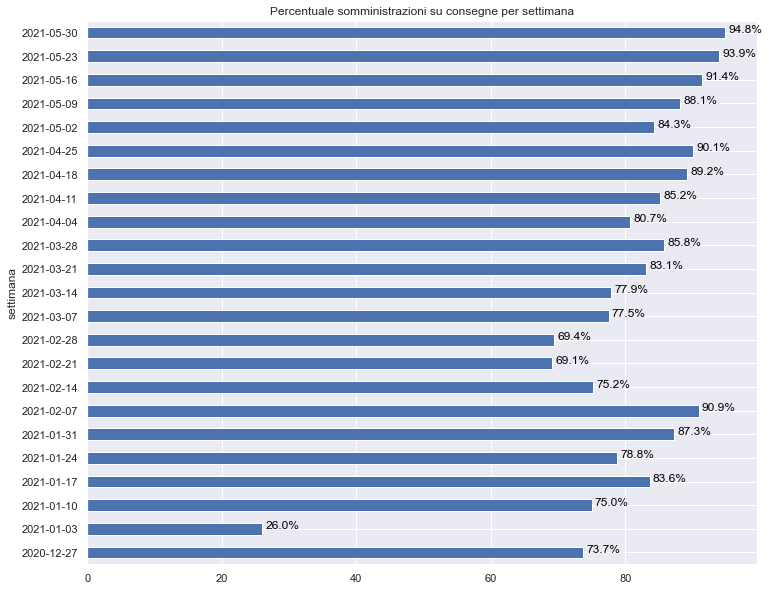

In [25]:
fig, ax =plt.subplots()
somministrazioni_consegne_sett = df_somministrazioni_t.resample('W').sum()['totale'].cumsum()/df_consegne_t.resample('W').sum()['numero_dosi'].cumsum()
somministrazioni_consegne_sett = round(somministrazioni_consegne_sett*100, 1)
somministrazioni_consegne_sett.plot(kind='barh', title='Percentuale somministrazioni su consegne per settimana')
for index, row in enumerate(somministrazioni_consegne_sett):
    plt.text(x = row+3 , y=index, s=f'{row}%', color='black', ha="center")

ax.set_yticklabels(sorted(set(somministrazioni_consegne_sett.index.astype(str).values)))
plt.ylabel('settimana')
plt.show()

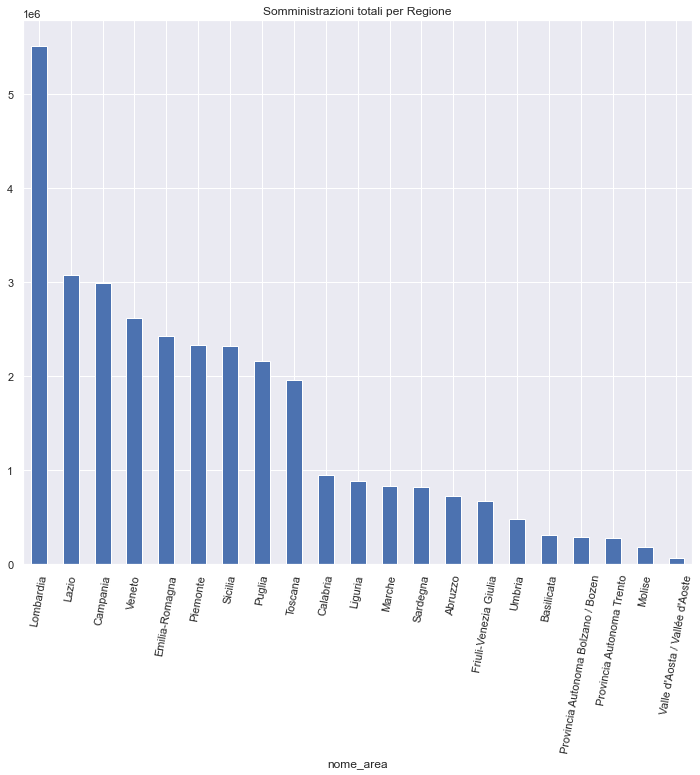

In [26]:
df_somministrazioni.groupby('nome_area')\
            .sum()['totale']\
            .sort_values(ascending=False)\
            .plot(kind='bar',
                    title='Somministrazioni totali per Regione')
plt.xticks(rotation=80)
plt.show()

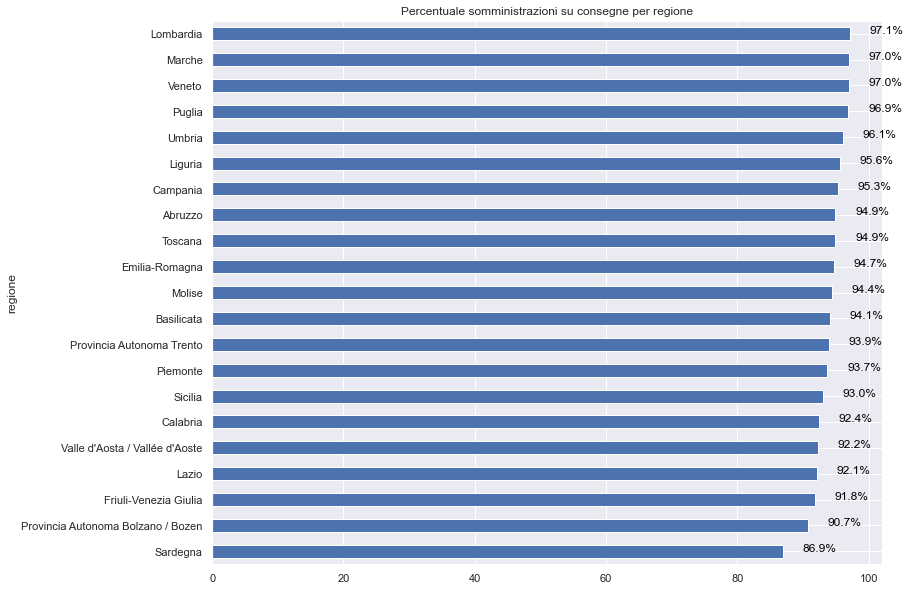

In [27]:
somministrazioni_consegne_regioni = df_somministrazioni.groupby('nome_area').sum()['totale']/df_consegne.groupby('nome_area').sum()['numero_dosi']
somministrazioni_consegne_regioni = round(somministrazioni_consegne_regioni.sort_values()*100, 1)
somministrazioni_consegne_regioni.plot(kind='barh', title='Percentuale somministrazioni su consegne per regione')
for index, row in enumerate(somministrazioni_consegne_regioni):
    plt.text(x = row+3 , y=index, s=f'{row}%', color='black')
plt.ylabel('regione')
plt.show()

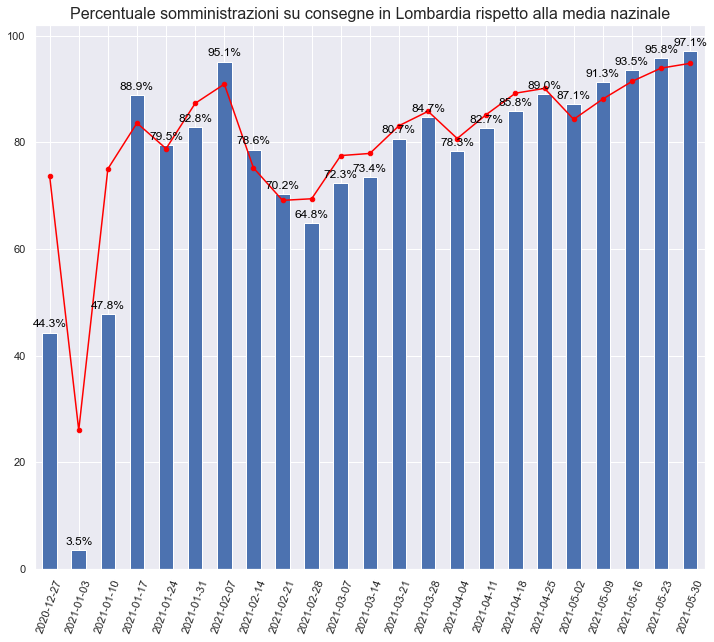

In [83]:
regione='Lombardia'
somministrazioni_consegne_sett_regione = pd.DataFrame(df_somministrazioni_t[df_somministrazioni_t.nome_area==regione]\
                                                      .resample('W').sum()['totale']\
                                                      .cumsum()/df_consegne_t[df_consegne_t.nome_area==regione]\
                                                      .resample('W').sum()['numero_dosi'].cumsum(), columns=['values'])
somministrazioni_consegne_sett_regione = round(somministrazioni_consegne_sett_regione*100, 1)
somministrazioni_consegne_sett_regione['target']=somministrazioni_consegne_sett.values
somministrazioni_consegne_sett_regione['week'] = sorted(set(somministrazioni_consegne_sett_regione.index.astype(str).values))

ax = somministrazioni_consegne_sett_regione['target'].plot(x='week', use_index=False, color='red', marker='.', markersize=9)
somministrazioni_consegne_sett_regione['values'].plot(x='week', ax=ax, kind='bar', use_index=False)
ax.set_xticklabels(sorted(set(somministrazioni_consegne_sett_regione.index.astype(str).values)), rotation=70)
for index, row in enumerate(somministrazioni_consegne_sett_regione['values'].values):
    plt.text(x = index , y=row+1, s=f'{row}%', color='black', ha="center")

plt.title(f"Percentuale somministrazioni su consegne in {regione} rispetto alla media nazinale", fontsize = 16)
plt.show()

In [31]:
df_somministrazioni_sett = u.get_dfweekly_from_df(df_somministrazioni_t, 'fornitore', 'totale')
df_somministrazioni_sett

,totale,fornitore
data_somministrazione,,
2020-12-27,7182,Pfizer/BioNTech
2021-01-03,117410,Pfizer/BioNTech
2021-01-10,549254,Pfizer/BioNTech
2021-01-17,541669,Pfizer/BioNTech
2021-01-24,229657,Pfizer/BioNTech
...,...,...
2021-05-02,78448,Janssen
2021-05-09,83393,Janssen
2021-05-16,73765,Janssen


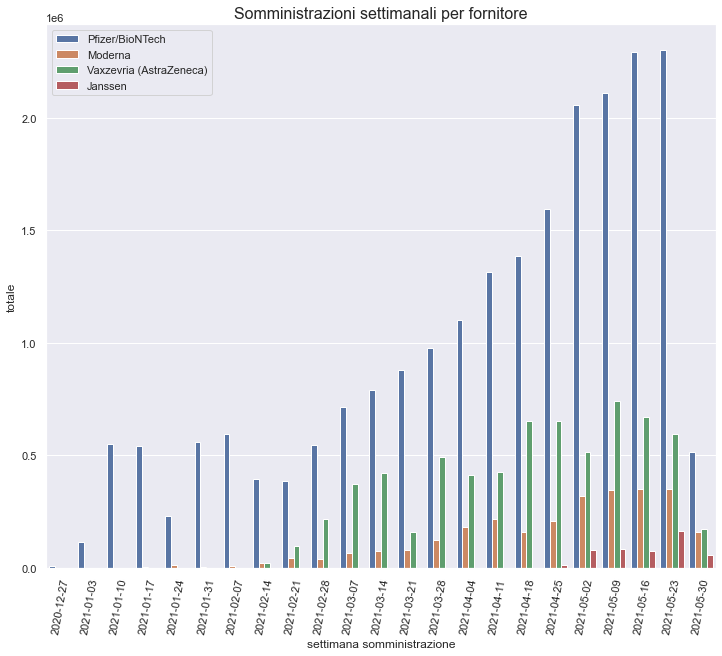

In [66]:
fig, ax = plt.subplots()
sns.barplot(data = df_somministrazioni_sett, x=df_somministrazioni_sett.index, y='totale', hue='fornitore',ci=None, ax=ax)
plt.title('Somministrazioni settimanali per fornitore', fontsize=16)
plt.xticks(rotation=80)
plt.legend(loc='upper left')
plt.xlabel('settimana somministrazione')
ax.set_xticklabels(sorted(set(df_somministrazioni_sett.index.astype(str).values)))
plt.show()

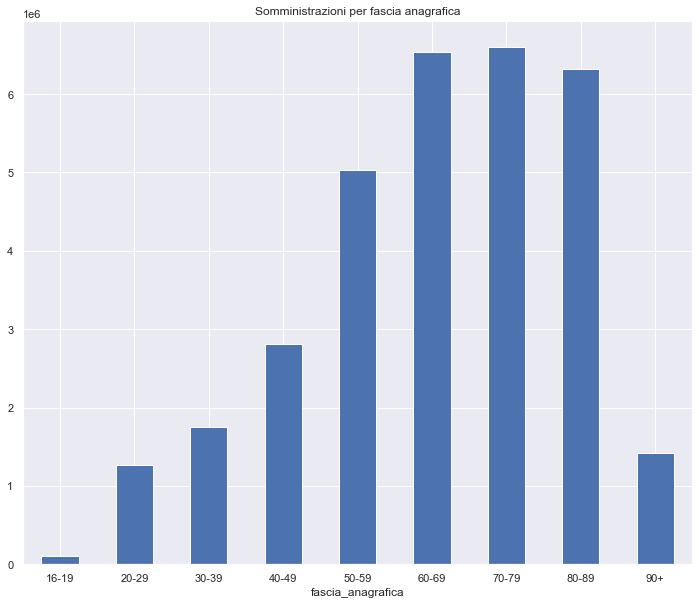

In [33]:
df_somministrazioni.groupby('fascia_anagrafica')['totale'].sum().plot(kind='bar')
plt.title('Somministrazioni per fascia anagrafica')
plt.xticks(rotation=0)
plt.show()

In [34]:
categorie = ['categoria_operatori_sanitari_sociosanitari',
       'categoria_personale_non_sanitario', 'categoria_ospiti_rsa',
       'categoria_60_69', 'categoria_70_79', 'categoria_over80',
       'categoria_forze_armate', 'categoria_personale_scolastico',
       'categoria_soggetti_fragili', 'categoria_altro']

In [35]:
d = {}
for c in categorie:
    d[c] = df_somministrazioni[c].sum()

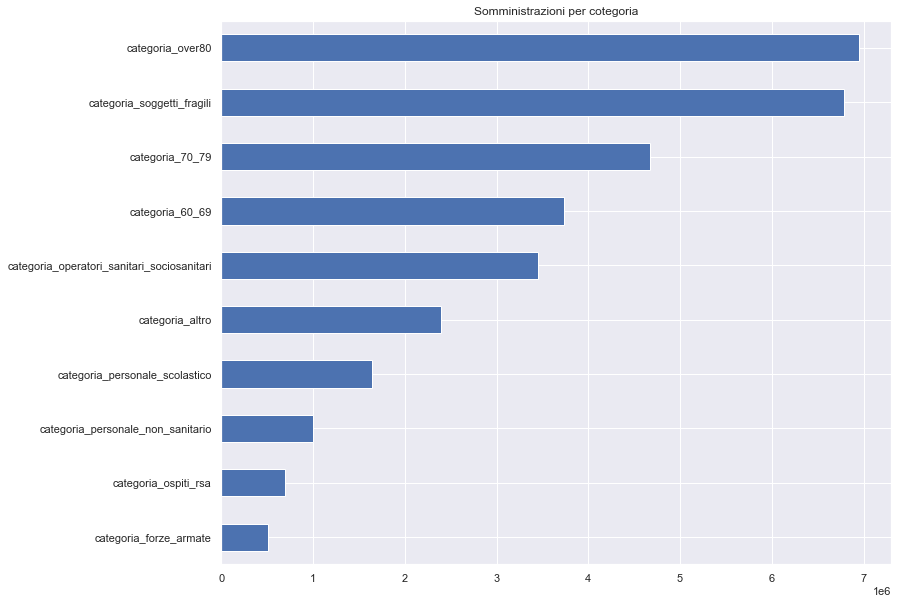

In [36]:
df_categorie = pd.Series(d)
df_categorie.sort_values().plot(kind='barh')
plt.title('Somministrazioni per cotegoria')
plt.show()

In [37]:
df_fasce_sett = u.get_dfweekly_from_df(df_somministrazioni_t, 'fascia_anagrafica', 'totale')
df_fasce_sett

,totale,fascia_anagrafica
data_somministrazione,,
2020-12-27,686,20-29
2021-01-03,11031,20-29
2021-01-10,52541,20-29
2021-01-17,61078,20-29
2021-01-24,21567,20-29
...,...,...
2021-05-02,10593,16-19
2021-05-09,14556,16-19
2021-05-16,18196,16-19


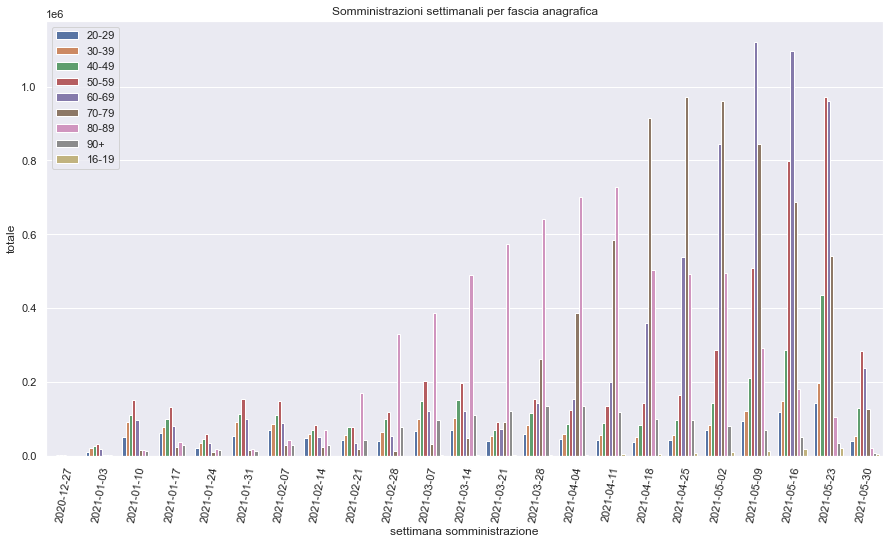

In [38]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data = df_fasce_sett, x=df_fasce_sett.index, y='totale', hue='fascia_anagrafica',ci=None, ax=ax)
plt.title('Somministrazioni settimanali per fascia anagrafica')
plt.legend(loc='upper left')
plt.xlabel('settimana somministrazione')
ax.set_xticklabels(sorted(set(df_fasce_sett.index.astype(str).values)), rotation=80)
# ax.xaxis.set_major_formatter(myFmt)
plt.show()

### 3.3.Contagi

In [39]:
df_contagi.shape

(9597, 30)

In [40]:
df_contagi.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido', 'codice_nuts_1', 'codice_nuts_2'],
      dtype='object')

In [41]:
df_contagi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9597 entries, 0 to 9596
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   data                                    9597 non-null   datetime64[ns]
 1   stato                                   9597 non-null   object        
 2   codice_regione                          9597 non-null   int64         
 3   denominazione_regione                   9597 non-null   object        
 4   lat                                     9597 non-null   float64       
 5   long                                    9597 non-null   float64       
 6   ricoverati_con_sintomi                  9597 non-null   int64         
 7   terapia_intensiva                       9597 non-null   int64         
 8   totale_ospedalizzati                    9597 non-null   int64         
 9   isolamento_domiciliare                  9597 non-nul

In [42]:
df_contagi.tail()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
9592,2021-05-25 17:00:00,ITA,19,Sicilia,38.115697,13.362357,575,93,668,11936,...,NaN,3.0,NaN,NaN,223642.0,0.0,2474468.0,1939820.0,ITG,ITG1
9593,2021-05-25 17:00:00,ITA,9,Toscana,43.769231,11.255889,568,134,702,9724,...,NaN,5.0,NaN,NaN,236576.0,3358.0,3608569.0,1024132.0,ITI,ITI1
9594,2021-05-25 17:00:00,ITA,10,Umbria,43.106758,12.388247,77,13,90,1826,...,"Si fa presente che 4 dei ricoveri NON UTI, non...",0.0,NaN,NaN,56166.0,0.0,914231.0,398007.0,ITI,ITI2
9595,2021-05-25 17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,11,0,11,247,...,NaN,0.0,NaN,NaN,10889.0,636.0,95912.0,31653.0,ITC,ITC2
9596,2021-05-25 17:00:00,ITA,5,Veneto,45.434905,12.338452,400,66,466,10065,...,Nei valori riportati per le terapie intensive ...,5.0,NaN,NaN,410552.0,11681.0,5327716.0,2520943.0,ITH,ITH3


In [43]:
df_contagi.nunique()

data                                       457
stato                                        1
codice_regione                              21
denominazione_regione                       21
lat                                         21
long                                        22
ricoverati_con_sintomi                    2379
terapia_intensiva                          598
totale_ospedalizzati                      2529
isolamento_domiciliare                    6140
totale_positivi                           6270
variazione_totale_positivi                2064
nuovi_positivi                            1929
dimessi_guariti                           7562
deceduti                                  4001
casi_da_sospetto_diagnostico              2711
casi_da_screening                         2205
totale_casi                               8116
tamponi                                   9392
casi_testati                              8384
note                                       874
ingressi_tera

In [44]:
447*21

9387

In [45]:
df_contagi.groupby(by = ['data','denominazione_regione']).last()

stato  codice_regione        lat  \
data                denominazione_regione                                    
2020-02-24 18:00:00 Abruzzo                 ITA              13  42.351222   
                    Basilicata              ITA              17  40.639471   
                    Calabria                ITA              18  38.905976   
                    Campania                ITA              15  40.839566   
                    Emilia-Romagna          ITA               8  44.494367   
...                                         ...             ...        ...   
2021-05-25 17:00:00 Sicilia                 ITA              19  38.115697   
                    Toscana                 ITA               9  43.769231   
                    Umbria                  ITA              10  43.106758   
                    Valle d'Aosta           ITA               2  45.737503   
                    Veneto                  ITA               5  45.434905   

                                                long  ricoverati_con_sintomi  \
data                denominazione_regione                                      
2020-02-24 18:00:00 Abruzzo                13.398438                       0   
                    Basilicata             15.805148                       0   
                    Calabria               16.594402                       0   
                    Campania               14.250850                       0   
                    Emilia-Romagna         11.341721                      10   
...                                              ...                     ...   
2021-05-25 17:00:00 Sicilia                13.362357                     575   
                    Toscana                11.255889                     568   
                    Umbria                 12.388247                      77   
                    Valle d'Aosta           7.320149                      11   
                    Veneto                 12.338452                     400   

                                           terapia_intensiva  \
data                denominazione_regione                      
2020-02-24 18:00:00 Abruzzo                                0   
                    Basilicata                             0   
                    Calabria                               0   
                    Campania                               0   
                    Emilia-Romagna                         2   
...                                                      ...   
2021-05-25 17:00:00 Sicilia                               93   
                    Toscana                              134   
                    Umbria                                13   
                    Valle d'Aosta                          0   
                    Veneto                                66   

                                           totale_ospedalizzati  \
data                denominazione_regione                         
2020-02-24 18:00:00 Abruzzo                                   0   
                    Basilicata                                0   
                    Calabria                                  0   
                    Campania                                  0   
                    Emilia-Romagna                           12   
...                                                         ...   
2021-05-25 17:00:00 Sicilia                                 668   
                    Toscana                                 702   
                    Umbria                                   90   
                    Valle d'Aosta                            11   
                    Veneto                                  466   

                                           isolamento_domiciliare  \
data                denominazione_regione                           
2020-02-24 18:00:00 Abruzzo                                     0   
                    Basilicata                                  0   
     